In [1]:
import pandas as pd
import numpy as np

#Import CSV & Clean input
data_raw = pd.read_csv('dialogs.csv', sep='\\t' )
data_input = data_raw["\"input"]

for x in range(len(data_input)):
   data_input.iloc[x] = data_input.iloc[x].strip("\"")

<ipython-input-1-3f9afbe0328c>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw = pd.read_csv('dialogs.csv', sep='\\t' )


In [2]:
#Import Spacy & Language Module
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
#Optional Module: Custom Stopwords

## New stop words list 
#customize_stop_words = [ ]

## Mark them as stop words
#for w in customize_stop_words:
#    nlp.vocab[w].is_stop = True


In [4]:
#Lemmetization & Removal of Stopwords 

data_cleaned = data_input

data_cleaned = data_cleaned.apply(lambda text: " ".join(token.lemma_ for token in nlp(text)))
#                                                  if not token.is_punct))

#is_stop
#These save as strings, not tokens

data_tokenised = data_cleaned.apply(lambda line: nlp(line))



In [5]:
#Import Gensim & Cython (technical support library) 
import gensim
from gensim.models import Word2Vec

import Cython

c:\users\beutler\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
#Transform into data useable by Word2Vec
data_model = data_cleaned.apply(lambda line: line.split())

data_model =  data_model.to_numpy().tolist()

In [7]:
#Train Model - Currently 1 iteration:
# min_count = minimum # of instances of a word to create a vector (default 5)
# vector_size = degrees of freedom (default 100, typically between 10 and a few hundred)
# -> Hyperparameters

# workers = Core parallelization (enabled by Cython), speeds up training
# sg = Training algorythm (here 1 is skip-gram)

model_base = Word2Vec(data_model, min_count=10, vector_size=325, workers=4, sg=1 )


#Note: Tokens are never equivalent, so they EACH count as a different word
# -> Should probably still be implemented, but neads to use the text attribute, rather than the tokens,
# needs a different transformation to the current one



In [8]:
print (len(model_base.wv))

#print(model_base.wv.get_vecattr("yes", "count") )

print(model_base.wv.index_to_key)

# Change Doc with 4.0:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4


325
['.', 'be', 'I', '?', 'you', 'do', 'the', ',', 'to', 'it', 'a', 'that', "n't", 'what', 'have', 'go', 'of', 'he', 'they', 'and', 'in', 'we', 'like', 'so', 'my', 'for', 'yes', 'but', 'get', 'think', 'no', 'on', 'about', 'how', 'why', 'good', 'your', 'she', 'not', 'well', "'ll", 'want', 'too', 'know', 'there', 'with', 'really', 'see', 'at', 'will', 'this', 'one', 'would', 'all', 'can', 'just', 'look', '!', 'say', 'people', 'need', 'if', 'time', 'lot', 'should', 'nice', "'ve", 'then', 'make', 'right', 'out', 'take', 'school', 'money', 'mean', 'tell', 'oh', 'give', 'day', 'love', 'up', 'movie', 'new', 'much', '"', 'when', 'maybe', 'ca', 'come', 'course', 'sure', 'or', 'because', 'an', 'only', 'great', 'buy', 'car', 'today', 'who', 'okay', 'some', 'our', 'every', 'hear', 'use', 'something', "'s", 'eat', 'where', 'from', 'let', 'talk', 'thank', 'rain', 'more', 'his', 'next', 'now', 'house', 'start', 'work', 'job', 'problem', 'thing', '-', 'never', 'here', 'happen', 'other', 'year', 'off',

In [9]:
#COPY CODE WIP 
#Create Matrix for kMeans to use

# I am not yet completly sure what is happening here
# Source
# https://www.kdnuggets.com/2018/04/robust-word2vec-models-gensim.html


def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
feature_array = averaged_word_vectorizer(corpus=data_cleaned, model=model_base,
                                             num_features=325)
pd.DataFrame(feature_array)

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,-0.069366,0.131608,-0.068055,-0.048875,-0.034270,0.003308,-0.083503,0.019405,-0.136675,-0.025880,...,-0.082044,-0.063604,-0.012039,-0.159605,0.046156,0.029116,-0.101468,-0.034620,-0.168919,0.019534
1,-0.071598,0.134251,-0.068715,-0.048438,-0.035163,0.003676,-0.084613,0.021175,-0.142177,-0.026471,...,-0.083860,-0.066193,-0.020382,-0.162616,0.048359,0.033157,-0.103960,-0.037036,-0.171822,0.015088
2,-0.070515,0.132503,-0.067090,-0.046764,-0.032602,0.001384,-0.081645,0.026456,-0.146281,-0.025875,...,-0.084511,-0.066185,-0.022674,-0.164496,0.049216,0.032217,-0.109363,-0.035598,-0.172248,0.012351
3,-0.071030,0.134420,-0.067351,-0.046543,-0.034111,0.005204,-0.083147,0.023434,-0.140555,-0.024659,...,-0.082681,-0.064962,-0.018490,-0.163881,0.049194,0.033553,-0.105346,-0.035187,-0.170514,0.014195
4,-0.071476,0.134283,-0.068013,-0.046782,-0.033622,0.003484,-0.083413,0.023526,-0.144066,-0.024702,...,-0.083514,-0.065799,-0.020924,-0.162033,0.048160,0.033593,-0.106627,-0.036545,-0.172120,0.013278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,-0.070290,0.132911,-0.065977,-0.044439,-0.030961,0.002339,-0.080207,0.029057,-0.146676,-0.023299,...,-0.083467,-0.065177,-0.021888,-0.164232,0.049291,0.033008,-0.111822,-0.034423,-0.171821,0.010551
3720,-0.073368,0.137788,-0.069222,-0.049479,-0.035111,0.005951,-0.084289,0.019868,-0.140165,-0.024135,...,-0.083311,-0.066139,-0.017719,-0.162918,0.048007,0.034984,-0.105780,-0.038581,-0.171657,0.013714
3721,-0.069348,0.131474,-0.065344,-0.045409,-0.031384,0.001576,-0.079400,0.029885,-0.145505,-0.025435,...,-0.084112,-0.065343,-0.021767,-0.167596,0.050822,0.031551,-0.111684,-0.033281,-0.170925,0.011444
3722,-0.069819,0.132192,-0.065661,-0.044924,-0.031173,0.001957,-0.079804,0.029471,-0.146090,-0.024367,...,-0.083789,-0.065260,-0.021828,-0.165914,0.050056,0.032279,-0.111753,-0.033852,-0.171373,0.010997


In [38]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



cls = MiniBatchKMeans(n_clusters=61)
cls.fit(feature_array)
cls.predict(feature_array)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data_input.index.values
cluster_map['text'] = data_input.values
cluster_map['cluster'] = cls.labels_

cluster_map[cluster_map.cluster == 1]
cluster_map.to_csv(r'C:\Users\Beutler\Desktop\Data Exploration Project\Export_k.csv', index = False)

0.3903124622255774


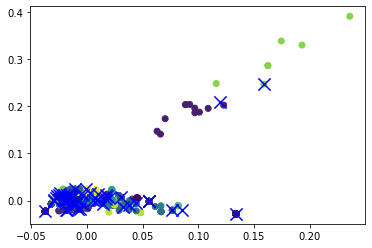

In [11]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_array)

reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter( reduced_features[:,0], reduced_features[:,1], c=cls.predict(feature_array))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


print(reduced_features.max())


#for x in range(len(cluster_map)):
#    print(reduced_features[x])

  #  if reduced_features[x].all() >= 0.9:
  #      print(x)

In [25]:
#Prediction Anstatz 3 - Ward Cluster (AgglomerativeClustering)

from sklearn.cluster import AgglomerativeClustering

Wcl = AgglomerativeClustering(n_clusters=25, linkage='ward').fit_predict(feature_array)

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


knn_graph = kneighbors_graph(feature_array, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(feature_array)
            elapsed_time = time.time() - t0
            plt.scatter(feature_array[:, 0], feature_array[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time), fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.83, wspace=0,left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' % (n_clusters, connectivity is not None), size=17)


plt.show()



[9 2 4 ... 5 5 4]


c:\users\beutler\appdata\local\programs\python\python38\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
<ipython-input-13-4ae003038dd2>:38: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(u[1] / u[0])
<ipython-input-13-4ae003038dd2>:38: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arctan(u[1] / u[0])


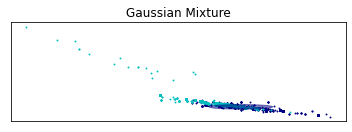

In [13]:
################################################

# Prediction Attempt 2: MoG
from sklearn import mixture

clG =  mixture.BayesianGaussianMixture(n_components=2, covariance_type='full') 
clG.fit(feature_array) #.toarray()


# Plot MoG model (one and done)
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)

    
plot_results(feature_array, clG.predict(feature_array), clG.means_, clG.covariances_, 1,
             'Gaussian Mixture')




In [39]:
model_conF_ward = AgglomerativeClustering(linkage='ward', connectivity=None, n_clusters=41)

model_conF_ward.fit_predict(feature_array)

cluster_map_model1 = pd.DataFrame()
cluster_map_model1['data_index'] = data_input.index.values
cluster_map_model1['text'] = data_input.values
cluster_map_model1['cluster'] = model_conF_ward.labels_

print(cluster_map_model1[cluster_map.cluster == 1])
cluster_map_model1.to_csv(r'C:\Users\Beutler\Desktop\Data Exploration Project\Export_model1.csv', index = False)


      data_index                                 text  cluster
6              6            what school do you go to?        5
17            17          which school do you attend?        5
22            22             how are you doing today?        5
30            30           how do you like it so far?        5
68            68                         why is that?        5
...          ...                                  ...      ...
3700        3700  and they couldn't fix your problem?        5
3703        3703              did she get a nice job?        5
3707        3707                why did they do that?        5
3714        3714                what's wrong with it?        5
3716        3716             what do you think it is?        5

[312 rows x 3 columns]


In [40]:
model_conF_comp = AgglomerativeClustering(linkage='complete', connectivity=None, n_clusters=41)

model_conF_comp.fit_predict(feature_array)

cluster_map_model2 = pd.DataFrame()
cluster_map_model2['data_index'] = data_input.index.values
cluster_map_model2['text'] = data_input.values
cluster_map_model2['cluster'] = model_conF_comp.labels_

print(cluster_map_model2[cluster_map.cluster == 1])
cluster_map_model2.to_csv(r'C:\Users\Beutler\Desktop\Data Exploration Project\Export_model2.csv', index = False)

      data_index                                 text  cluster
6              6            what school do you go to?       31
17            17          which school do you attend?       31
22            22             how are you doing today?       31
30            30           how do you like it so far?       31
68            68                         why is that?       31
...          ...                                  ...      ...
3700        3700  and they couldn't fix your problem?       31
3703        3703              did she get a nice job?       31
3707        3707                why did they do that?       31
3714        3714                what's wrong with it?       31
3716        3716             what do you think it is?       31

[312 rows x 3 columns]


In [41]:
knn_graph = kneighbors_graph(feature_array, 41, include_self=False)

model_conT_ward = AgglomerativeClustering(linkage='ward', connectivity=knn_graph, n_clusters=41)

model_conT_ward.fit_predict(feature_array)

cluster_map_model3 = pd.DataFrame()
cluster_map_model3['data_index'] = data_input.index.values
cluster_map_model3['text'] = data_input.values
cluster_map_model3['cluster'] = model_conT_ward.labels_

print(cluster_map_model3[cluster_map.cluster == 1])
cluster_map_model3.to_csv(r'C:\Users\Beutler\Desktop\Data Exploration Project\Export_model3.csv', index = False)

c:\users\beutler\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


      data_index                                 text  cluster
6              6            what school do you go to?       12
17            17          which school do you attend?       12
22            22             how are you doing today?       12
30            30           how do you like it so far?       12
68            68                         why is that?       12
...          ...                                  ...      ...
3700        3700  and they couldn't fix your problem?       12
3703        3703              did she get a nice job?       12
3707        3707                why did they do that?       12
3714        3714                what's wrong with it?       12
3716        3716             what do you think it is?       12

[312 rows x 3 columns]
